In [39]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
data=pd.read_csv(r"C:\Users\user\Desktop\AIML_Timeseries\week1\testset.csv")
data['datetime']=data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M"))
data=data.set_index('datetime')
if data['Temperature'].isnull().values.any()==True:
    data[data['Temperature'].isnull()]=data['Temperature'].mean()
newdata = data['2001':].resample('M').mean()
#newdata['Temperature'].isnull().values.any()  
newdata.head()

,Temperature
datetime,
2001-01-31,12.657776
2001-02-28,18.286759
2001-03-31,23.560144
2001-04-30,29.663181
2001-05-31,32.987991


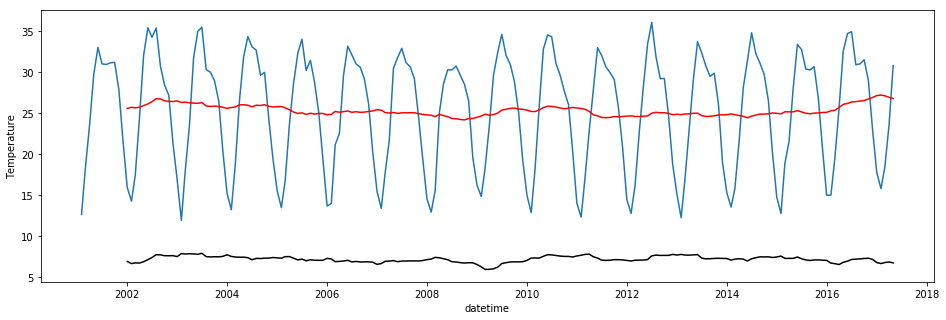

In [46]:


movingaverage=newdata['Temperature'].rolling(window=12).mean()
movingstd=newdata['Temperature'].rolling(window=12).std()

plt.figure(figsize=(16,5))
plt.xlabel('datetime')
plt.ylabel('Temperature')
plt.plot(newdata)
plt.plot(movingaverage, color='red')
plt.plot(movingstd, color='black')
#print(newdata['Temperature'].mean())

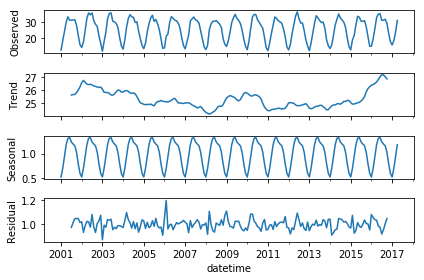

In [32]:
result = seasonal_decompose(newdata['Temperature'],model='multiplicative')
result.plot()
plt.show()
#type(newdata['Temperature'])

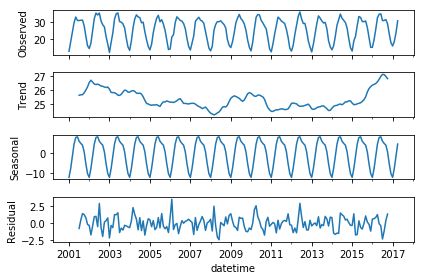

In [33]:
result2 = seasonal_decompose(newdata['Temperature'],model='additive')
result2.plot()
plt.show()

As the rolling mean varies there is a variation in the trend. Hence we can use the multiplicative model.

In [34]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    movingstd=ts.rolling(window=12).std()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
   # print("type of df_test: ",type(df_test))
  #  print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
   # print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)
    

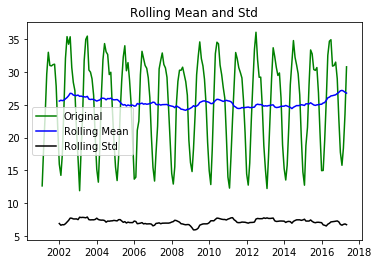

Augmented Dickey-Fuller test:
Test Statistic                  -1.448570
p-value                          0.558783
#Lags Used                      11.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


In [35]:
stationarity_check(newdata['Temperature'])

As the ADF tests shows that the resampled TS is not stationary. Let us try differencing.

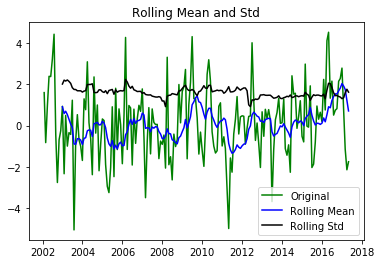

Augmented Dickey-Fuller test:
Test Statistic                  -4.424476
p-value                          0.000269
#Lags Used                      12.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)            -2.575863
dtype: float64


In [47]:

newdata_diff_m=newdata['Temperature'].diff(12)
newdata_diff_m=newdata_diff_m.dropna()
#newdata_diff_m.head()
stationarity_check(newdata_diff)


After differencing of the data, the Time series is stationary.

Q1. Explain, in detail, the above transform methods.
--------------------------------------------------------------------------
Data transformation is the process of converting data from one format or structure into another format or structure which can be used for our analysis.

Square transform : The data values are converted to its squares.
Log transform : The data points are converted to the natural logarithms.
Square root transform: Data points are converted to their square roots.
Box Cox transform :here the values are transformed to make the data to normal. The parameter of the transformation is lambda which varies from -5 to 5. The formula is
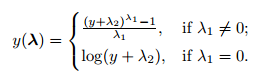 ,where  lambda is positive.

If lambda is negative then:

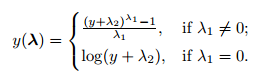
